This project uses Time series analysis as a powerful statistical tool  to analyze time-ordered data points. I will be demonstrating the process of performing time series analysis and building forecasting models using Python.

**Collect Time Series Data**: Fetch historical stock prices.
- **Perform Exploratory Data Analysis (EDA)**: Visualize and understand the data.
- **Decompose the Time Series**: Analyze trend, seasonality, and residuals.
- **Test for Stationarity**: Use statistical tests to assess stationarity.
- **Transform the Data**: Apply differencing and transformations to achieve stationarity.
- **Analyze Autocorrelations**: Use ACF and PACF plots to identify patterns.
- **Build ARIMA Models**: Develop models based on statistical properties.
- **Evaluate the Model**: Assess model performance using statistical metrics.
- **Forecast Future Values**: Predict future stock prices using the model.

In [1]:
#Data Collection 
import yfinance as yf 

#Defining ticker symbol 
ticker = 'MSFT' 

#Fetching historical data 
data = yf.download(ticker, start = '2010-01-01', end = '2023-01-01')

#Displaying first five rows 
print(data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  30.620001  31.100000  30.590000  30.950001  23.347324  38409100
2010-01-05  30.850000  31.100000  30.639999  30.959999  23.354866  49749600
2010-01-06  30.879999  31.080000  30.520000  30.770000  23.211531  58182400
2010-01-07  30.629999  30.700001  30.190001  30.450001  22.970140  50559700
2010-01-08  30.280001  30.879999  30.240000  30.660000  23.128559  51197400


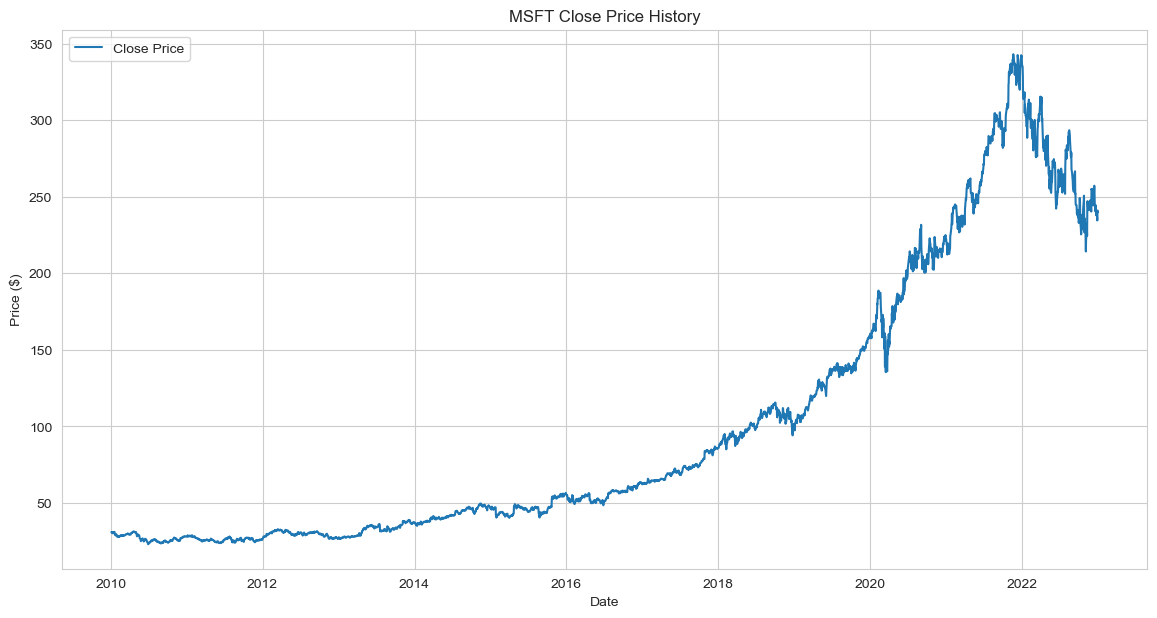

In [2]:
#Exploratory Data Analysis 

#Visualziing the closing price 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Setting figure size and style 
plt.figure(figsize=(14,7))
sns.set_style('whitegrid')

#plotting the closing price 
plt.plot(data['Close'], label ='Close Price')
plt.title(f'{ticker} Close Price History')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

I can see here that stock price shows overall upwards trend 
some seasonality or cyclical patterns

Decompising the time series trend, seasonality, and residual components using the seasonal_decompose function from statsmodel library 

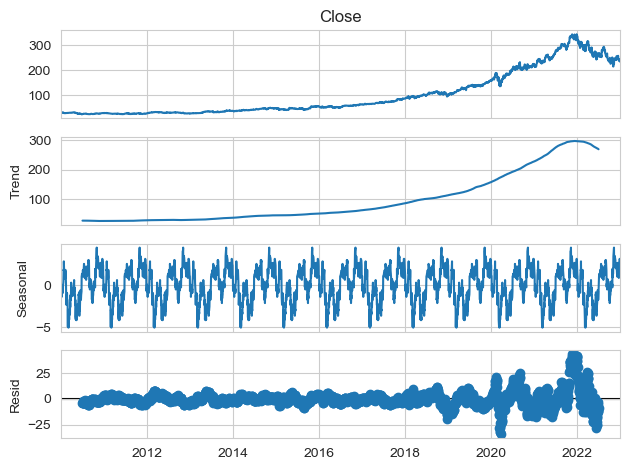

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decompose the series 
result = seasonal_decompose(data['Close'], model='additive', period=252)
#Approximatley one trading year

#plotting the decomposition 
result.plot()
plt.show()

## Observations
- trend: long term movement in the data
- seasonality: repated patterns at fixed intervals
- residual: remaining noise after removing trend and seasonality

In [6]:
# Stationary Testing 
#Majority of the time time series models, data needs to be stationary

#Using Augmented Dickey-Fuller Test to check ofr stationarity 
from statsmodels.tsa.stattools import adfuller

#Perform ADF test 
adf_result = adfuller(data['Close'])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
for key,value in adf_result[4].items(): 
    print('Critical Value (%s): %.3f' % (key, value))

ADF Statistic: 0.176250
p-value: 0.970898
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


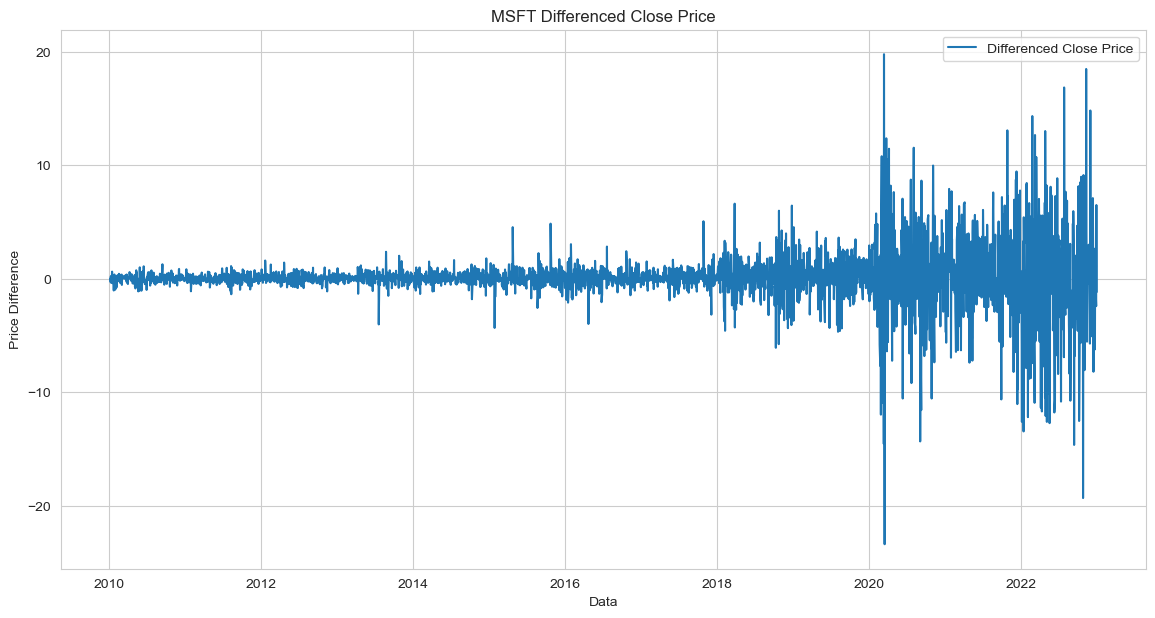

In [7]:
#Differencing to stablize the mean of the time series by removing changes in the level of 
#a time series

#First-order differencing 
data['Close_diff'] = data['Close'].diff()

#Drop NaN values 
data_diff = data.dropna()

#Plot the differenced data
plt.figure(figsize=(14,7))
plt.plot(data_diff['Close_diff'], label = 'Differenced Close Price')
plt.title(f'{ticker} Differenced Close Price')
plt.xlabel('Data')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

In [8]:
#Performing ADF test on differenced data
adf_result_diff = adfuller(data_diff['Close_diff'])

print('ADF Statistics: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
for key, value in adf_result_diff[4].items(): 
    print('Critical Value (%s): %.3f' % (key, value))

ADF Statistics: -16.040069
p-value: 0.000000
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567


##### p-value is now less than 0.05 indicating stationarity
##### Differencing had helped achieve stationarity

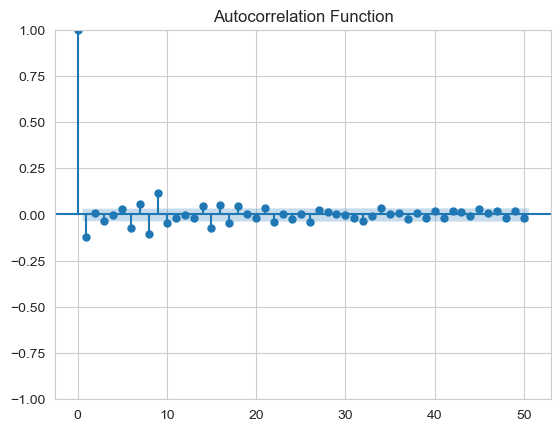

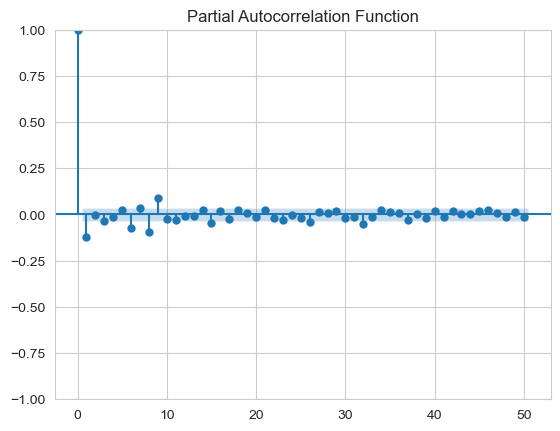

In [10]:
#Autocorrelation and Partial Autocorrelation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plotting ACF
plot_acf(data_diff['Close_diff'], lags=50)
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF
plot_pacf(data_diff['Close_diff'], lags = 50)
plt.title('Partial Autocorrelation Function') 
plt.show()

### Observations

- **ACF (Autocorrelation Function)**: Shows the correlation of the time series with its own lagged values.
- **PACF (Partial Autocorrelation Function)**: Shows the correlation with lagged values after removing the effects of earlier lags.

**ARIMA(p, d, q)** model where:
  - **p**: Number of autoregressive terms.
  - **d**: Number of non-seasonal differences needed for stationarity.
  - **q**: Number of lagged forecast errors in the prediction equation.

In [13]:
#Implementing ARIMA

#Using ACF and PACF plot to determine the values of p and q

from statsmodels.tsa.arima.model import ARIMA 

#defining the model 
model = ARIMA(data['Close'], order=(1,1,1)) #Example parameters 

#fitting the model
model_fit = model.fit()

#summary of model 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3272
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7579.636
Date:                Thu, 19 Sep 2024   AIC                          15165.273
Time:                        14:30:00   BIC                          15183.551
Sample:                             0   HQIC                         15171.818
                               - 3272                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0393      0.059     -0.663      0.507      -0.156       0.077
ma.L1         -0.0848      0.060     -1.404      0.160      -0.203       0.034
sigma2         6.0289      0.057    105.449      0.0

/Users/samys/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samys/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samys/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


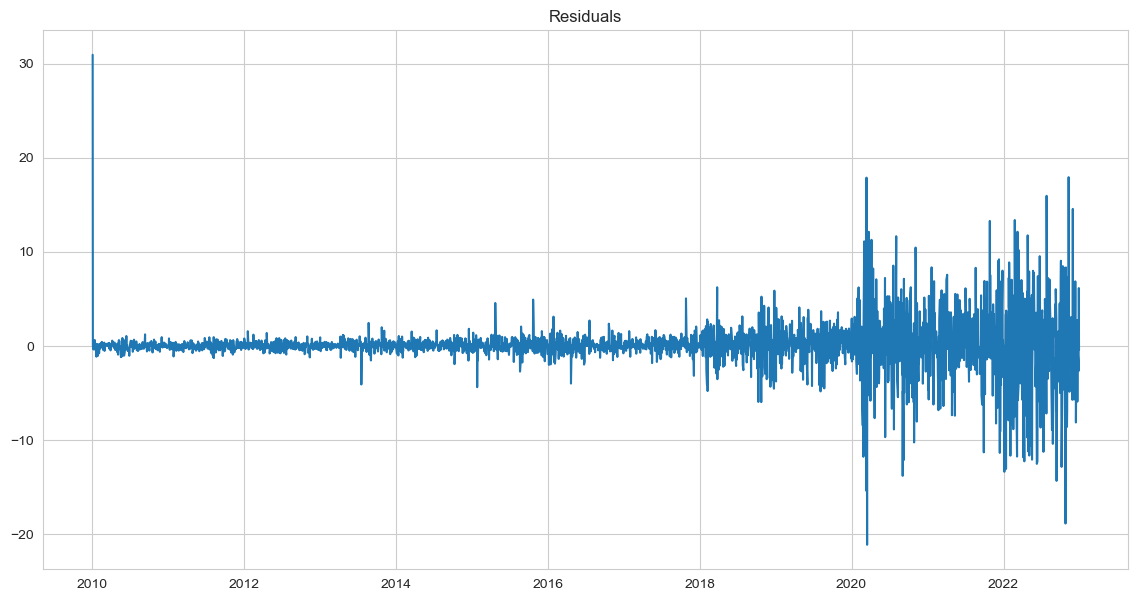

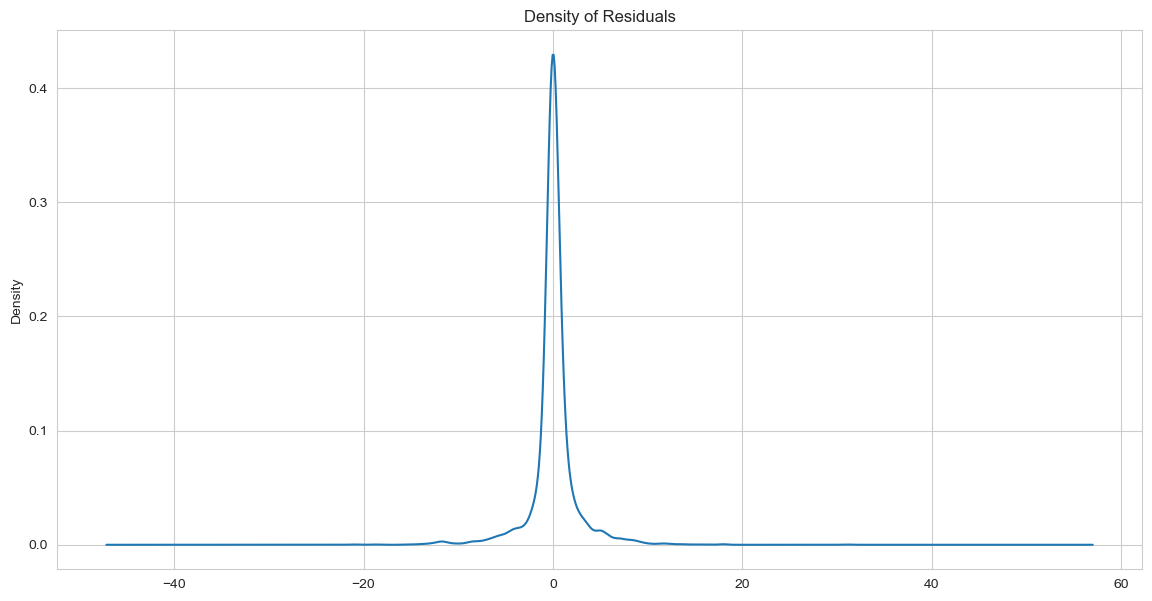

count    3272.000000
mean        0.081976
std         2.512971
min       -21.115929
25%        -0.378351
50%         0.034538
75%         0.548942
max        30.950001
dtype: float64


In [14]:
#Residual Analysis 

#plotting residuals 
residuals = model_fit.resid
plt.figure(figsize=(14,7))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

#plot density of residuals 
plt.figure(figsize=(14,7))
residuals.plot(kind='kde')
plt.title('Density of Residuals')
plt.show()

#summary of statistics 
print(residuals.describe())

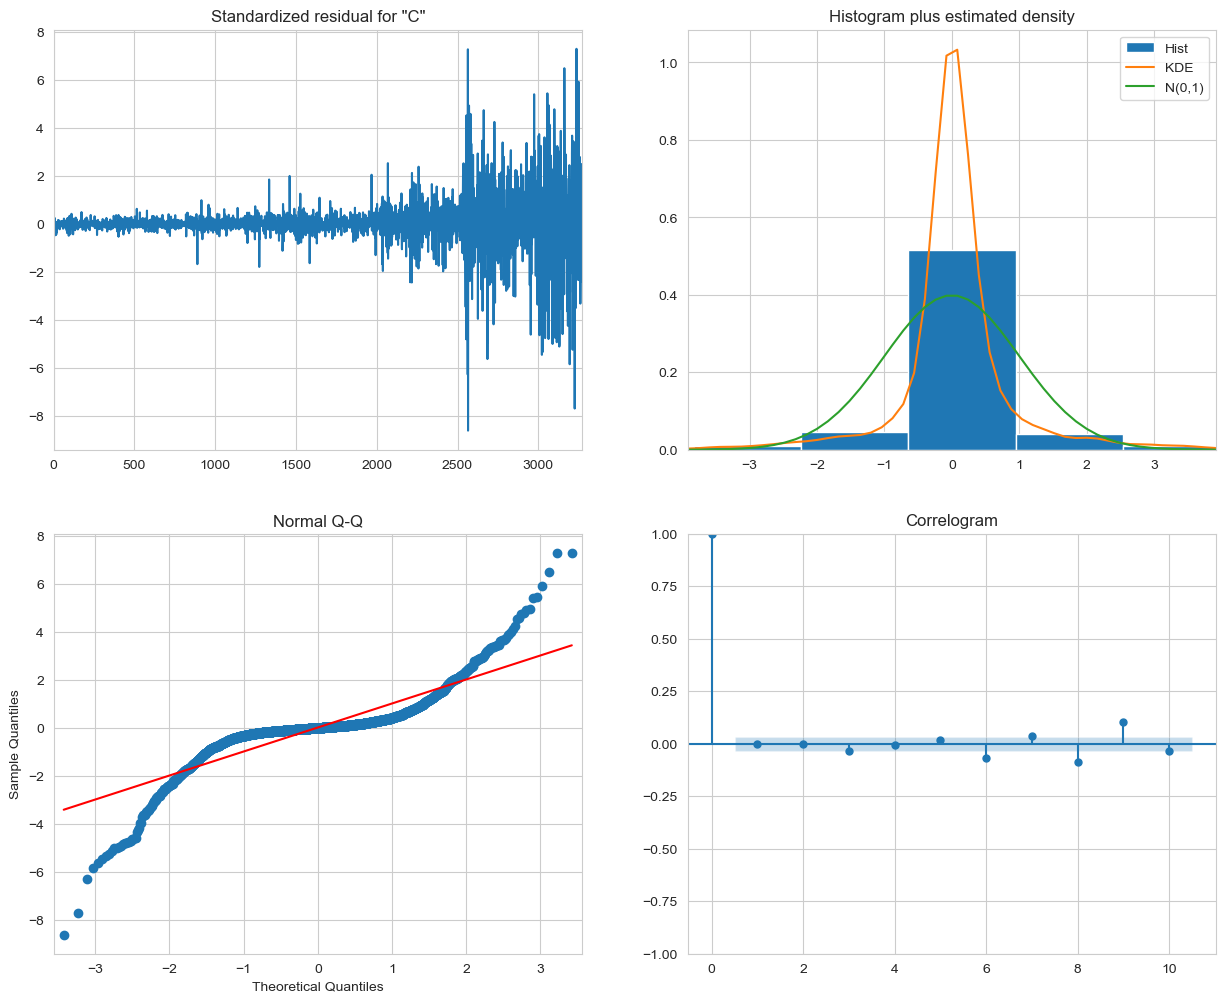

In [15]:
#Model diagnostics 
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

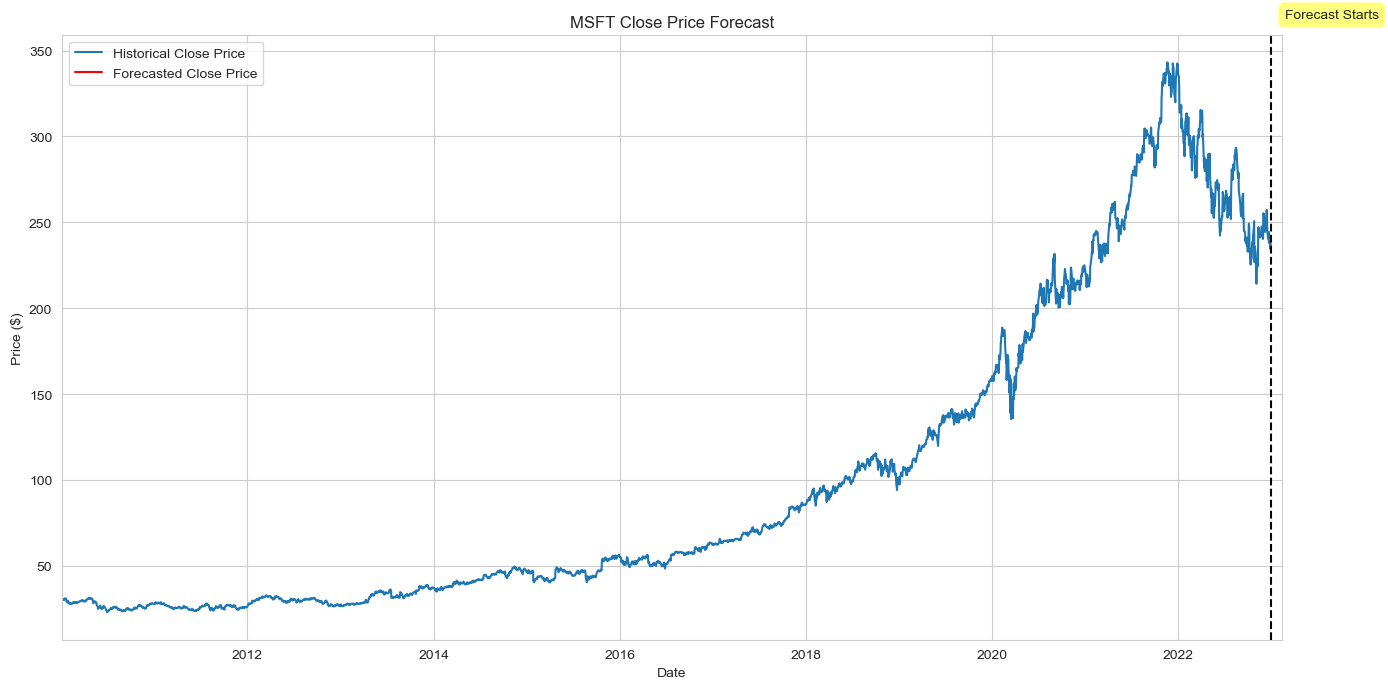

Last historical date: 2022-12-30 00:00:00
First forecast date: 2023-01-02 00:00:00
Forecast range: nan - nan

Forecast head:
            Forecast
2023-01-02       NaN
2023-01-03       NaN
2023-01-04       NaN
2023-01-05       NaN
2023-01-06       NaN

Forecast tail:
            Forecast
2023-02-06       NaN
2023-02-07       NaN
2023-02-08       NaN
2023-02-09       NaN
2023-02-10       NaN


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Making predictions
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create the date range for the forecast period
last_date = data.index[-1]
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='B')[1:]

# Assign the date index to the forecast
forecast = pd.Series(forecast, index=forecast_dates)

# Create forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast})

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Price')
plt.plot(forecast_df['Forecast'], label='Forecasted Close Price', color='red')
plt.title(f'{ticker} Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()

# Ensure the entire forecast is visible
plt.xlim(data.index[0], forecast_df.index[-1])

# Add vertical line to separate historical data and forecast
plt.axvline(x=last_date, color='k', linestyle='--')

# Annotate the start of forecast
plt.annotate('Forecast Starts', xy=(last_date, plt.gca().get_ylim()[1]), xytext=(10, 10), 
             textcoords='offset points', ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# Print some diagnostic information
print("Last historical date:", data.index[-1])
print("First forecast date:", forecast_df.index[0])
print("Forecast range:", forecast_df['Forecast'].min(), "-", forecast_df['Forecast'].max())
print("\nForecast head:")
print(forecast_df.head())
print("\nForecast tail:")
print(forecast_df.tail())